In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

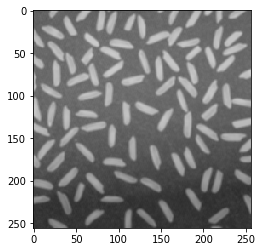

In [2]:
rice = cv2.imread('./rice.png')
plt.imshow(rice)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Threshold 200'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

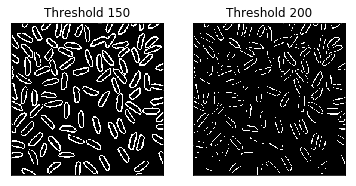

In [17]:
rice_sobel_x = cv2.Sobel(rice, cv2.CV_64F, 1, 0, ksize=3)
rice_sobel_y = cv2.Sobel(rice, cv2.CV_64F, 0, 1, ksize=3)
rice_sobel_magnitude = cv2.magnitude(rice_sobel_x, rice_sobel_y)

_, rice_threshold150 = cv2.threshold(rice_sobel_magnitude, 150, 255, cv2.THRESH_TOZERO)
_, rice_threshold200 = cv2.threshold(rice_sobel_magnitude, 200, 255, cv2.THRESH_TOZERO)

# plot
plt.subplot(121), plt.imshow(rice_threshold150)
plt.title("Threshold 150"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(rice_threshold200)
plt.title("Threshold 200"), plt.xticks([]), plt.yticks([])

In [18]:
filter_size = 5
variance = 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Sharpened Gaussian - 200'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

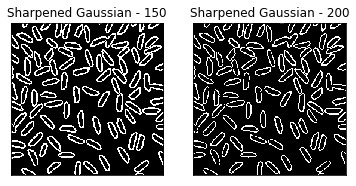

In [37]:
gaussian_rice = cv2.GaussianBlur(rice, (filter_size, filter_size), variance)
gaussian_detail = rice - gaussian_rice
sharpened_gaussian_rice = rice + gaussian_detail

gaussian_rice_sobel_x = cv2.Sobel(sharpened_gaussian_rice, cv2.CV_64F, 1, 0, ksize=3)
gaussian_rice_sobel_y = cv2.Sobel(sharpened_gaussian_rice, cv2.CV_64F, 0, 1, ksize=3)
gaussian_rice_sobel_magnitude = cv2.magnitude(gaussian_rice_sobel_x, gaussian_rice_sobel_y)

_, gaussian_rice_threshold150 = cv2.threshold(gaussian_rice_sobel_magnitude, 150, 150, cv2.THRESH_TOZERO)
_, gaussian_rice_threshold200 = cv2.threshold(gaussian_rice_sobel_magnitude, 200, 200, cv2.THRESH_TOZERO)

# plot
plt.subplot(121), plt.imshow(gaussian_rice_threshold150)
plt.title("Sharpened Gaussian - 150"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gaussian_rice_threshold200)
plt.title("Sharpened Gaussian - 200"), plt.xticks([]), plt.yticks([])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Sharpened Box - 200'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

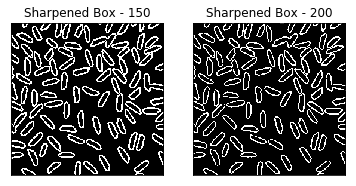

In [36]:
box_filter = np.ones((filter_size, filter_size), np.float32)/(filter_size * filter_size)
box_rice = cv2.filter2D(rice, -1, box_filter)
box_detail = rice - box_rice
sharpened_box_rice = rice + box_detail

box_rice_sobel_x = cv2.Sobel(sharpened_box_rice, cv2.CV_64F, 1, 0, ksize=3)
box_rice_sobel_y = cv2.Sobel(sharpened_box_rice, cv2.CV_64F, 0, 1, ksize=3)
box_rice_sobel_magnitude = cv2.magnitude(box_rice_sobel_x, box_rice_sobel_y)

_, box_rice_sobel_threshold150 = cv2.threshold(box_rice_sobel_magnitude, 150, 150, cv2.THRESH_TOZERO)
_, box_rice_sobel_threshold200 = cv2.threshold(box_rice_sobel_magnitude, 200, 200, cv2.THRESH_TOZERO)

# plot
plt.subplot(121), plt.imshow(box_rice_sobel_threshold150)
plt.title("Sharpened Box - 150"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(box_rice_sobel_threshold200)
plt.title("Sharpened Box - 200"), plt.xticks([]), plt.yticks([])

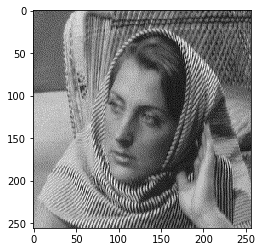

In [32]:
woman = cv2.imread('woman.png')
plt.imshow(woman)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, '20% Thres'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

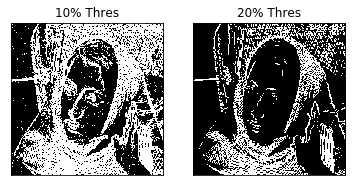

In [39]:
woman_sobel_x = cv2.Sobel(woman, cv2.CV_64F, 1, 0, ksize=3)
woman_sobel_y = cv2.Sobel(woman, cv2.CV_64F, 0, 1, ksize=3)
woman_magnitude = cv2.magnitude(woman_sobel_x, woman_sobel_y)

max_val = np.max(woman_magnitude)

_, woman_threshold10 = cv2.threshold(woman_magnitude, max_val*0.1, max_val*0.1, cv2.THRESH_TOZERO)
_, woman_threshold20 = cv2.threshold(woman_magnitude, max_val*0.2, max_val*0.2, cv2.THRESH_TOZERO)

# plot
plt.subplot(121), plt.imshow(woman_threshold10)
plt.title("10% Thres"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(woman_threshold20)
plt.title("20% Thres"), plt.xticks([]), plt.yticks([])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, '20% Thres'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

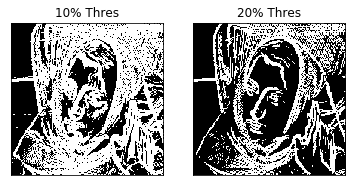

In [42]:
kernel = np.ones((3,3), np.float32)/(3*3)
box_woman = cv2.filter2D(woman, -1, kernel)

box_woman_sobel_x = cv2.Sobel(box_woman, cv2.CV_64F, 1, 0, ksize=3)
box_woman_sobel_y = cv2.Sobel(box_woman, cv2.CV_64F, 0, 1, ksize=3)
box_woman_magnitude = cv2.magnitude(box_woman_sobel_x, box_woman_sobel_y)

max_val = np.max(box_woman_magnitude)

_, box_woman_threshold10 = cv2.threshold(box_woman_magnitude, max_val*0.1, max_val*0.1, cv2.THRESH_TOZERO)
_, box_woman_threshold20 = cv2.threshold(box_woman_magnitude, max_val*0.2, max_val*0.2, cv2.THRESH_TOZERO)

# plot
plt.subplot(121), plt.imshow(box_woman_threshold10)
plt.title("10% Thres"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(box_woman_threshold20)
plt.title("20% Thres"), plt.xticks([]), plt.yticks([])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


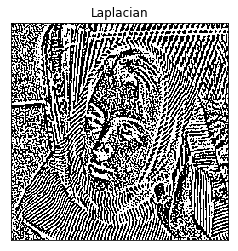

In [45]:
woman_lap = cv2.Laplacian(woman, cv2.CV_64F, ksize=5)

# plot
plt.title("Laplacian"), plt.xticks([]), plt.yticks([])
plt.imshow(woman_lap)